In [1700]:
import numpy as np;
import cv2;
import matplotlib.pyplot as plt;

1. Distance between PDFs: In this question you will explore the other “distances” between PDFs dis-
cussed in class. To verify the implementation of these distances, use the normalized histogram of the
stereo image pair (left.png, right.png) used in the previous assignment.

(a) Cross Entropy (CE): The cross entropy between two PDFs (PMFs) p and q is given by: H(p, q) =
H(p) + D(p||q) where H(p) is the entropy of p and D(p||q) is the KL divergence between p and
q. Write a function that accepts two PDFs (PMFs) p, q and outputs the CE between them.

In [1703]:
# Code For H(p,q)
#H(p,q)=-(summation)p(i)log(qi)
# here p is true distribution and q is predicted distribution
# and H(p,q) is distance to encode p from q
def Cross_Entropy(p,q):
    
    p=p[p>0]
    q=q[q>0]
    # print(f'{len(p)}');
    # print(f'{len(q)}');
    return -np.sum(p*np.log2(q));

In [1704]:
#Entropy of true distribution
def Entropy(p):
    # if(np.any(p)<=0):
    #     raise ValueError("PMF must not contain negative-value.")
    if(np.sum(p)!=1):
        raise ValueError("PMF must sum to 1.")
    p=p[p>0];    
    return -np.sum(p*np.log2(p));

In [1705]:
#Relative Entropy(KL Divergence)
#Dkl(p||q)=-(summation)(p(i)*log(p(i)/q(i)))
#Measues how much q diverges from p
def KL_Divergence(p,q):
    # if(len(p)!=len(q)):
    #     raise ValueError("Dimension of both p and q must be equal.")
    
    # if(np.sum(p)!=1 or np.sum(q)!=1):
    #     raise ValueError("PMF must sum to 1.")
    sum=0;
    for i in range(len(p)):
       if p[i]>0 and q[i]>0:
          sum=sum+p[i]*np.log2(p[i]/q[i]);
    return sum;

i. Verify your function using the stereo image normalized histogram pair. (1)

In [1707]:
def normalized_histogram(image_path):
    # image=cv2.imread('image_path',cv2.IMREAD_GRAYSCALE);
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_array=np.array(image);
    # print(image_array);
    histogram,_=np.histogram(image_array,bins=256,range=(0,256));
    image_size=image_array.size;
    # print(f'{image_size}')
    norm_histogram=histogram / image_size;
    return norm_histogram;

In [1708]:
#Now Going step-by-step
#Step1 Taking Input of image

right_IP='./right.png'
left_IP='./left.png'

#let us take left as true
#so p=left and q=right(perdicted)
p=normalized_histogram(left_IP);
q=normalized_histogram(right_IP);
# print(f'{hist1}')

#H(p,q)
CE=Cross_Entropy(p,q);

# #H(p)
entropy=Entropy(p);

# #D(p||q)
KL=KL_Divergence(p,q);

print(f'H(p,q)={CE}')
print(f'H(p)={entropy}');
print(f'K(p||q)={KL}');

print(f'H(p)+(D(p||q))={KL+entropy}')
print(f'H(p)+(D(p||q)-H(p,q))={KL+entropy-CE:.8f}')
print('H(p,q)=H(p)+D(p||q)')
print('Hence verified')


H(p,q)=7.273398119987325
H(p)=7.258294104749939
K(p||q)=0.015104015237387051
H(p)+(D(p||q))=7.273398119987326
H(p)+(D(p||q)-H(p,q))=0.00000000
H(p,q)=H(p)+D(p||q)
Hence verified


ii. As with the KL divergence problem, choose a fixed PMF p ∼ Bern(r). Choose another PMF
q ∼ Bern(s) where s can be varied. Plot H(p, q) as a function of s. From the plot, does
minimizing H(p, q) give us matched PMFs? (1)

In [1711]:
#Cross Entropy of Bernouli
#H(p,q)=-plog(q)-(1-p)log(1-q)
def Bernouli_Cross_Entropy(p,q):
    return -p*np.log2(q)-(1-p)*np.log2(1-q);

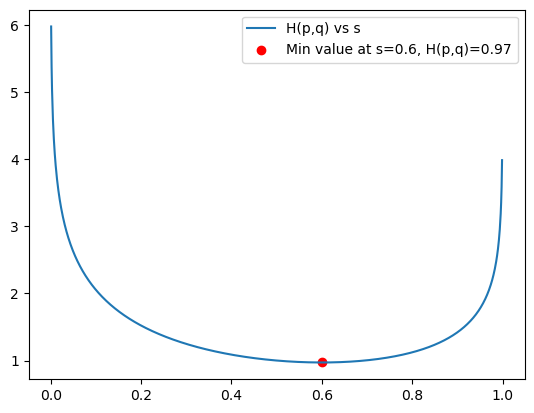

From above Graph we can see that H(p,q) is minimum when s=r
Hence verified


In [1712]:
#fixed r
r=0.6
#vary s
s=np.arange(0.001,1,0.001);
arr=[];
for i in s:
    x=Bernouli_Cross_Entropy(r,i)
    arr.append(x)
min_index = np.argmin(arr)
min_x=s[min_index]
min_y=arr[min_index]
plt.plot(s,arr,label='H(p,q) vs s');
plt.scatter(min_x,min_y ,color='red',label=f'Min value at s={min_x}, H(p,q)={min_y:.2f}')
plt.title="H(p,q) vs s"
plt.xlabel="s"
plt.ylabel="H(p,q)"
plt.legend()
plt.show();
print('From above Graph we can see that H(p,q) is minimum when s=r');
print('Hence verified')

(b) Jensen Shannon (JS) Divergence: The definition of JS divergence between two PDFs p and q is
given by: J(p, q) = 0.5 ∗ (D(p||m) + D(q||m)) where m =(p+q)/2 and D(p||q) is the KL divergence between p and q. Write a function that accepts two PDFs (PMFs) p, q and outputs the JS divergence between them. Verify that the JS(p, q) is symmetric indeed while D(p||q) is not. Again,use the normalized histograms of the stereo image pair.

In [1715]:
#so now Let use write code for JS Divergence
# as JS(p||q)=(KL(p||m)+KL(q||m))/2 where m=(p+q)/2
def JS_Divergence(p,q):
    # if(len(p)!=len(q)):
    #     raise ValueError("Dimension of both p and q must be equal.")
    m=(p+q)/2;
    return (KL_Divergence(p,m)+KL_Divergence(q,m));

In [1716]:
# now taking the image histogram input
right_IP='./right.png'
left_IP='./left.png'

p=normalized_histogram(left_IP);
q=normalized_histogram(right_IP);
#D(p||q)
d1=KL_Divergence(p,q);
#D(q||p)
d2=KL_Divergence(q,p);
print(f'KL(p||q)-KL(q||p)= {d1-d2}')
#JS(p||q)
j1=JS_Divergence(p,q);
#JS(q||p)
j2=JS_Divergence(q,p);
print(f'JS(p||q)-JS(q||p)= {j1-j2}')
print('Hence JS_Div is symmetric while KL_Div is not');

KL(p||q)-KL(q||p)= 0.0006942294040325637
JS(p||q)-JS(q||p)= 0.0
Hence JS_Div is symmetric while KL_Div is not


(c) Wasserstein Distance: The Wasserstein-1 distance between two PDFs r and s is given by: W1(r,s) =
inf   E(x,y)∼π|x − y|. 
π∈Π(r,s)


The set Π(r,s) is composed of all bivariate joint PDFs whose marginals
equal r and s. Given a tuple (p(X,Y),rX,sY) of a joint histogram p(X,Y) and marginals rX,sY,
write a function that accepts this tuple and checks if pX,Y ∈ Π(r,s). Verify your function with a
positive example and a negative example.

In [1719]:
# Check_Joint_Marginals function that give that a given pmf satifies the marginals or not
def Check_Joint_Marginals(p,r,s):
    #marginal row
    mar_row=np.sum(p,axis=1)
    #margina column
    mar_col=np.sum(p,axis=0)
    return np.allclose(mar_row,r) and np.allclose(mar_col,s);

In [1720]:
# Example positive case (valid joint distribution)

# Joint distribution
p1 = np.array([[0.1, 0.2], [0.3, 0.4]]) 
# Marginal of X
r1 = np.array([0.3, 0.7])  
# Marginal of Y
s1 = np.array([0.4, 0.6]) 



# Example negative case (invalid joint distribution)

# Joint distribution
p2 = np.array([[0.1, 0.2], [0.3, 0.4]])  
# Marginal of X
r2 = np.array([0.4, 0.6])  
# Marginal of Y
s2 = np.array([0.5, 0.5])  

print(Check_Joint_Marginals(p1, r1, s1))  
# Expected: True

print(Check_Joint_Marginals(p2, r2, s2))  
# Expected: False

True
False


2. Visualizing Data Using t-SNE:

(a) Read the t-SNE paper and answer the following questions. Do not reproduce text from the paper
verbatim in your answers.

i. What is the crowding problem? 

Answer**

Crowding Problem occurs when we move data from high dimensional to low dimension.

So there are three types to pair of distance between two point in high dimension

1.Small Distance

2.Moderate Distance

3.Large Distance

In lower dimension:-

1.Small distance between point can be modeled well.

2.Large Distance or Moderate Distance: Since Lower dimension does not have that much space that these point modeled well.
  Means the point that are far may be squeezed up and point that are moderately near may be far due to crowding

This lead to crowding and making it harder to distinguish natural clusters or relationships between points.

  

ii. How does the choice of the Student t-distribution in the low dimensional embedding space
help address the crowding problem? (1)

Answer**

Above we have discussed crowding problem Now here we see how Student t-distribution in low dimensional embedding help address the crowding problem.

This distribution is heavy-tailed than normal distribution means probablity of observing very large distance is higher this characteristic allows the model to better represent points that are farther apart in the original high-dimensional space, reducing the risk that they will be squeezed together or too tightly in the low-dimensional space.

This adjustment helps create a more accurate and visually interpretable low dimension data map, with better separation between clusters and less crowding of points in the center of the map.

iii. What other important changes have been made in t-SNE relative to SNE? (1)

Answer***

1.SNE uses a Gaussian distribution to model the pairwise distances between points in the lower-dimensional space while t-sne use Student t-distribution with heavy tail that helps in resolving problem of overcrowding.

2.SNE directly minimizes the difference between probabilities of pairwise distances using the Gaussian distribution while t-sne uses KL divergence between the pairwise probability distributions in high-dimensional and low-dimensional spaces.

3.SNE use complex and less efficient  optimization technique while t-SNE use more efficient optimization techniques, such as gradient descent with early exaggeration and momentum this helps in early convergence. 

4.SNE use non-symmetric cost function while t-SNE use symmetric cost function making it more stable and easier to optimize.


(b) In this problem, implement Algorithm 1 from the paper, albeit in a simplified setting as described
in the following.

• Generate two clusters of points from a ten-dimensional multivariate Gaussian (MVG) distri-bution N (μ, 0.01·I) where I is the ten-dimensional identity matrix.

• Use μ1 = 1 for one cluster and μ2 = 10 · 1 for the other (where 1 is the ten-dimensional
vector of ones).

• Generate 10 points from each cluster for a total of 20 points to form the set X .

• Choose the dimension of the embedding to be two.

• Choose T = 50.

• Experiment with different choices for η and α(t). For simplicity, let α(t) not change with
iterations.

• Use your knowledge of how X was generated for choices of σi

(as opposed to finding them

using the user-defined Perplexity).

• Plot the points in Y at the beginning and at the end of 50 iterations. Print your observations
from the plots.

• Find and print D(P||Q) at the beginning and at the end of 50 iterations. Print your observa-
tions from these values.

In [1738]:
# so now generating two clusters of points

#number of point each cluster -> n
n=10
#dimension of each cluster ->dim
dim=10

#mean of cluster1 -> u1
u1=np.ones(dim);
#mean of cluster2 -> u2
u2=10*np.ones(dim)

#covaiance matrix of each cluster -> sigma
cov_matrix=0.01*np.eye(dim)

np.random.seed(3)
cluster1 = np.random.multivariate_normal(u1, cov_matrix, n)
cluster2 = np.random.multivariate_normal(u2, cov_matrix, n)


# appending both as row wise
X = np.vstack([cluster1, cluster2])


In [1740]:
#||x-y||^2
def dist(x,y):
    return np.sum((x-y)**2);


In [1741]:
# now writing code for p(j|i)
#p(j|i)=e(-||x(i)-x(j)||^2/sigma)/(where (k!=i)sum(-(||x(i)-x(k)||^2)/sigma)

#2sigmasquare
#here i have assume 2*sigma square =sigma ******
sigma=3;
# print(f'{arr}')        


In [1742]:
# calculating p
def conditional_prob(X,i,j):
    if i==j:
        return 0;
    x=np.exp(-dist(X[i],X[j])/sigma);
    div = 0
    for k in range(20):
        if k != j:
            div = div + np.exp(-dist(X[j] , X[k])/sigma)
    return x/div;

In [1743]:
def sym_normalized_distribution(X,i,j):
    x=conditional_prob(X,i,j);
    y=conditional_prob(X,j,i);
    res=(x+y)/40;
    return res;
    

In [1744]:
#now getting all p(i|j)
p = np.zeros((20,20))
for i in range(0,20):
    for j in range(0,20):
        p[i][j]=sym_normalized_distribution(X,i,j);

In [1745]:
# function to calculate q(j|i):
def similarity(Y):
    div2=0;
    for i in range (0,20):
        for j in range (0,20):
            if(i==j):
               continue;
            x=(1+dist(Y[i],Y[j]))**(-1);
            div2=div2+x;
        
        
    q = np.zeros((20,20))
    for i in range(0,20):
        for j in range(0,20):
            x=((1+dist(Y[i],Y[j]))**(-1))/div2;
            q[i][j]=x;
    return q;

In [1746]:
#now going to low dimension state with 2 dimension
Y = np.random.rand(20, 2)
q=similarity(Y);
# print(f'{q}')

****Y at the start of iteration****


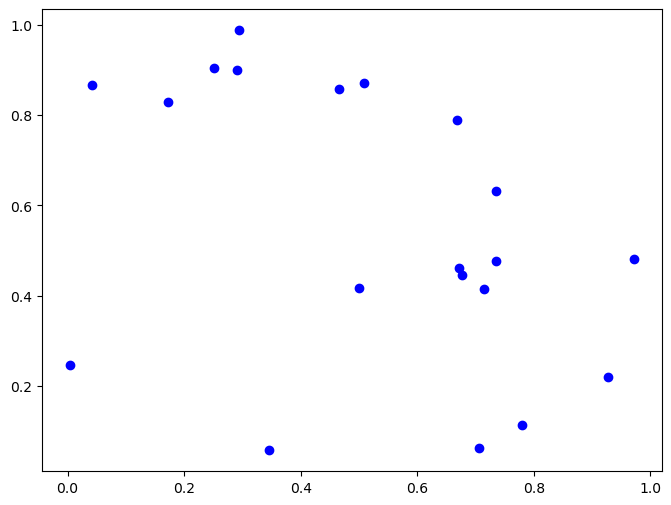

In [1747]:
# Extract x and y coordinates
x = Y[:, 0]
y = Y[:, 1]
print("****Y at the start of iteration****")
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', marker='o')
# plt.title("Y at the start of iteration")
plt.show()

In [1748]:
KL=KL_Divergence(p.flatten(),q.flatten());
print(f'KL_Divergence at the start={KL}')
# print(f'{res}')    

KL_Divergence at the start=1.122653278434622


In [1749]:
iter=50;
eta=0.1;
alpha=0.5;

In [1750]:
#array that stores Y value after each iteration 
Y_array = np.zeros((52,20, 2));
Y_array[1]=Y;
Y_array[0]=np.random.rand();

In [1751]:
# Y=Y_array[it]
def grad_term(Y,i,p,q):
    res=np.zeros(2);
    for j in range(0,20):
        scalar=p[i][j]-q[i][j]
        scalar=scalar/(1+dist(Y[i],Y[j]))
        res[0]=res[0]+scalar*(Y[i][0]-Y[j][0])
        res[1]=res[1]+scalar*(Y[i][1]-Y[j][1])

    res[0]=res[0]*4;
    res[1]=res[1]*4;
    return res;

In [1752]:
def gradient_Descent(Y,it,p,q):
    for i in range(0,20):
        Y[it][i]=Y[it-1][i]+eta*(grad_term(Y[it-1],i,p,q))+alpha*(Y[it-1][i]-Y[it-2][i]);
    return Y
    

In [1753]:
for i in range (2,52):
    Y=Y_array[i]
    q=similarity(Y) 
    Y_array = gradient_Descent(Y_array,i,p,q);

[[-0.84253488 -0.47797607]
 [ 0.54964001 -0.82023088]
 [-0.24593465  1.10388372]
 [ 1.07240356  0.01138145]
 [ 0.60634998  0.34060457]
 [ 0.10512718  0.80797892]
 [-0.48754876  0.75377312]
 [-0.79037732  0.84483692]
 [ 0.49246565 -0.07547133]
 [ 0.48656883 -0.04479637]
 [ 0.66906551 -0.68719702]
 [ 0.05099222  0.91264864]
 [ 1.00189372 -0.441545  ]
 [-0.49763649  0.95283409]
 [-0.30624054 -0.79296263]
 [ 0.53380414 -0.01806038]
 [ 0.57145489  0.11457028]
 [ 0.03163233 -0.0169888 ]
 [-0.41352847  0.94942492]
 [ 0.42354421  0.73689399]]
****Y at the end of iteration****


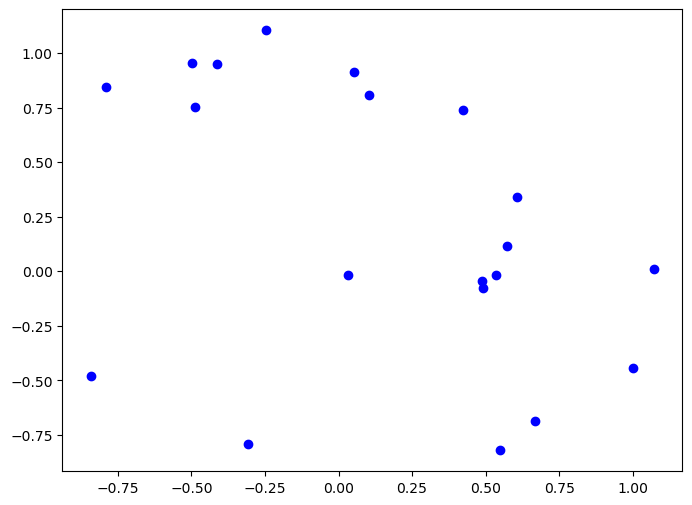

In [1755]:
# Extract x and y coordinates
Y=Y_array[51]
print(f'{Y}');
x = Y[:, 0]
y = Y[:, 1]
print("****Y at the end of iteration****")
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', marker='o')
# plt.title("Y at the start of iteration")
plt.show()

In [1756]:
KL=KL_Divergence(p.flatten(),q.flatten());
print(f'KL_Divergence at the end={KL}')

KL_Divergence at the end=1.0782986057052613


In [1757]:
print(f'KL_Divergence decreases with iterations and points change their position')

KL_Divergence decreases with iterations and points change their position


(c) Now, experiment with the built-in t-SNE utility in matplotlib. Choose four different perplexity
values (between 5 and 50) and generate t-SNE plots for these choices. How does perplexity affect
the plots?

In [1760]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import seaborn as sns

In [1761]:
# Load dataset
data = load_iris()
X = data.data
y = data.target

# perplexity values to test
perplexities = [5, 20, 30, 50]

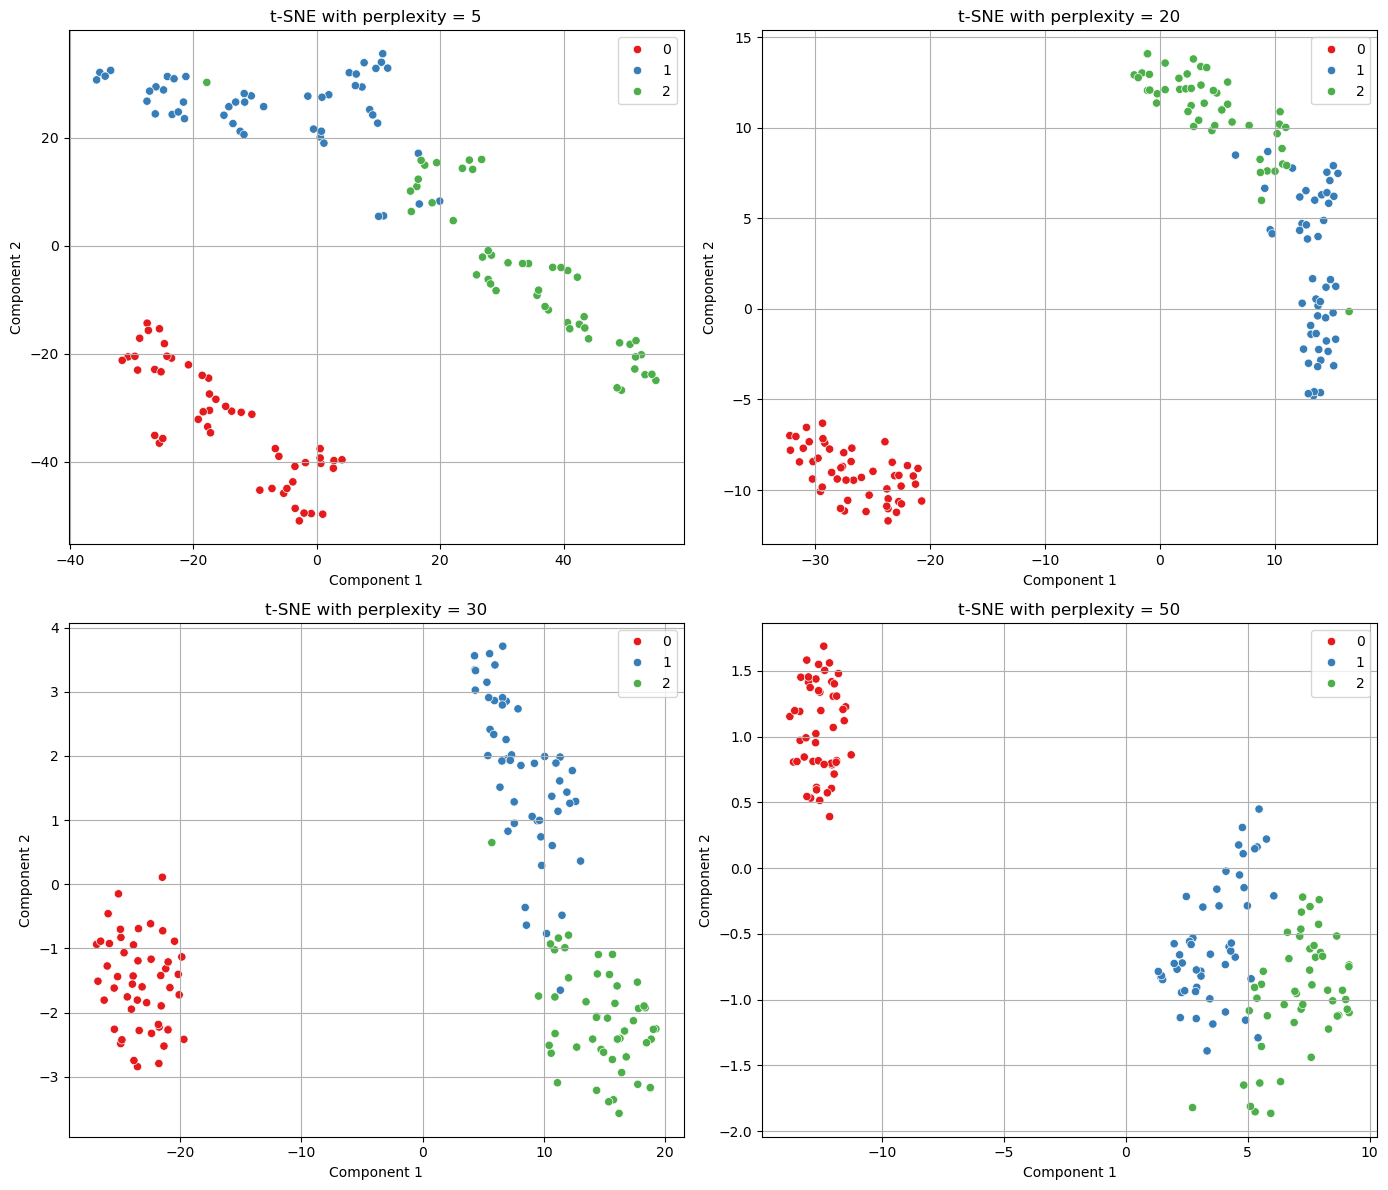

In [1762]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=31)
    X_tsne = tsne.fit_transform(X)
    
    ax = axes[i // 2, i % 2]
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1', ax=ax)
    ax.set_title(f't-SNE with perplexity = {perplexity}')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True)

plt.tight_layout()
plt.show()

Low Perplexity (5): Emphasizes local structure. we might see tighter, more distinct clusters.

Medium Perplexity (20, 30): A balance between local and global structure. The clusters are more separated and recognizable.

High Perplexity ( 50): Emphasizes global structure. Clusters overlap more.